In [1]:
train_path = './train.txt'
test_path = './test.txt'
submission_path = './submission.txt'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
plt.style.use('ggplot')

In [4]:
%matplotlib inline

In [5]:
from tqdm import tqdm_notebook

# Load data

In [6]:
with open(train_path) as f:
    print f.readline()[:100]

1 8:0.90099 12:0.064688 13:0.94562 17:0.047949 21:0.30267 25:0.88089 27:0.029732 30:0.88748 34:0.772


In [7]:
with open(test_path) as f:
    print f.readline()[:100]

-1 5:0.99354 11:0.93136 12:0.064688 17:0.40437 18:0.57917 21:0.77818 27:0.69668 29:0.5611 30:0.2644 


In [8]:
def load_feautures(path):
    dicts = []
    labels = []
    with open(path) as f:
        for line in tqdm_notebook(f.readlines()):
            splits = line.split()
            labels.append(int(splits[0]))
            dicts.append(dict())
            for split in splits[1:]:
                f,v = split.split(':')
                dicts[-1][int(f)] = float(v)
    return dicts, labels

In [9]:
train_dicts, train_labels = load_feautures(train_path)

In [10]:
test_dicts, test_labels = load_feautures(test_path)

# Convert to dataframes

In [11]:
import pandas as pd

In [12]:
train_df = pd.DataFrame(train_dicts).fillna(0)
train_df.head()

,1,2,3,4,5,6,7,8,9,10,...,691,692,693,694,695,696,697,698,699,700
0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0000,0.90099,0.0,0.0,...,0.0,0.0,0.0,0.50430,0.0,0.0,0.046567,0.00000,0.67177,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.55425,0.0,0.0,0.046567,0.00000,0.57433,0.0
2,0.0,0.0,0.85361,0.0,0.0,0.99392,0.0000,0.74949,0.0,0.0,...,0.0,0.0,0.0,0.45057,0.0,0.0,0.046567,0.00000,0.80732,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.00000,0.8087,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.41013,0.0,0.0,0.046567,0.61889,0.88279,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.00000,0.8087,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.50395,0.0,0.0,0.046567,0.61889,0.82378,0.0


In [13]:
test_df = pd.DataFrame(test_dicts).fillna(0)
test_df.head()

,1,2,3,4,5,6,7,8,9,10,...,691,692,693,694,695,696,697,698,699,700
0,0.0,0.0,0.0,0.0,0.99354,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.41983,0.055105,0.0,0.0,0.046567,0.0,0.50870,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.43373,0.055676,0.0,0.0,0.046567,0.0,0.29021,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.7938,...,0.0,0.0,0.30737,0.059910,0.0,0.0,0.046567,0.0,0.48511,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.32031,0.058858,0.0,0.0,0.046567,0.0,0.72621,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.34900,0.057773,0.0,0.0,0.046567,0.0,0.75185,0.0


In [14]:
a = set(train_df.columns)
b = set(test_df.columns)
print len(a.intersection(b))
print b.difference(a), 'are not contained in train dataset'
for val in list(b.difference(a)):
    del test_df[val]
test_df.head()

585
set([288, 512, 482, 67, 293, 391, 501, 217, 635, 156]) are not contained in train dataset


,1,2,3,4,5,6,7,8,9,10,...,691,692,693,694,695,696,697,698,699,700
0,0.0,0.0,0.0,0.0,0.99354,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.41983,0.055105,0.0,0.0,0.046567,0.0,0.50870,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.43373,0.055676,0.0,0.0,0.046567,0.0,0.29021,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.7938,...,0.0,0.0,0.30737,0.059910,0.0,0.0,0.046567,0.0,0.48511,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.32031,0.058858,0.0,0.0,0.046567,0.0,0.72621,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.34900,0.057773,0.0,0.0,0.046567,0.0,0.75185,0.0


In [15]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# See data

In [16]:
from sklearn.manifold import TSNE

In [51]:
train_mask = np.random.choice(train_df.shape[0], 5000)
test_mask = np.random.choice(test_df.shape[0], 5000)

In [52]:
tsne = TSNE(verbose=True)
z_data = tsne.fit_transform(train_df.ix[train_mask].append(test_df.ix[test_mask]))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.881763
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.387634
[t-SNE] Error after 325 iterations: 1.387634


[]

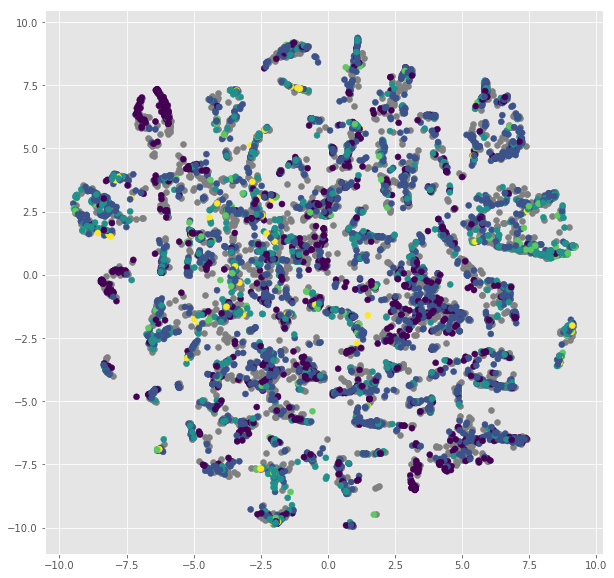

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(z_data[5000:,0], z_data[5000:,1], c='gray')
plt.scatter(z_data[:5000,0], z_data[:5000,1], c=train_labels[train_mask])
plt.plot()

# Semisupervised

In [17]:
from sklearn.semi_supervised import LabelPropagation

In [18]:
lpm = LabelPropagation(kernel='knn', n_jobs=-1)

In [ ]:
lpm.fit(train_df.append(test_df), np.hstack([train_labels,test_labels]))